In [31]:
%pip install PyPDF2
from pypdf import PdfReader

%pip install aiofiles

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\alnaf\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\alnaf\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:

# Reader  = PdfReader ('The Journal of Finance - 2023 - HASSAN - The Global Impact of Brexit Uncertainty.pdf')
# print(len(Reader .pages))
# page = Reader.pages[1] # first page
# print(page.extract_text())
# page = page.count('Brexit')

Official Working code - count words in a page and outputs count of the word. 

In [33]:
# from PyPDF2 import PdfReader
# import json

# def extract_text_from_pdf(file_path):
#     try:
#         # Synchronously read the PDF file
#         with open(file_path, 'rb') as file:
#             reader = PdfReader(file)
#             results = []
#             # Process only the first two pages
#             for i in range(min(45, len(reader.pages))):
#                 page = reader.pages[i]
#                 text = page.extract_text()
#                 count = text.count('Brexit')
#                 results.append({
#                     "page_number": i + 1,
#                     "occurrences_of_brexit": count,
#                     "extracted_text": text
#                 })
#             return results

#     except FileNotFoundError:
#         return f"Error: The file {file_path} was not found."
#     except OSError:
#         return f"Error: Could not read the file {file_path}. It may be corrupted or unreadable."
#     except Exception as e:
#         return f"An unexpected error occurred: {str(e)}"

# def save_results_to_json(results, output_path):
#     if isinstance(results, str):
#         print(results)  # Print error messages directly
#     else:
#         with open(output_path, 'w') as file:
#             json.dump(results, file, indent=4)
#         print(f"Results saved to {output_path}")

# def process_pdf_file():
#     file_path = 'The Journal of Finance - 2023 - HASSAN - The Global Impact of Brexit Uncertainty.pdf'
#     output_path = 'results.json'
#     results = extract_text_from_pdf(file_path)
#     save_results_to_json(results, output_path)

# # Run the function
# process_pdf_file()


Results saved to results.json
Total occurrences:
Brexit: 659
EU: 36
Sentiment: 104
Trade: 12
Risk: 178
Uncertainty: 29


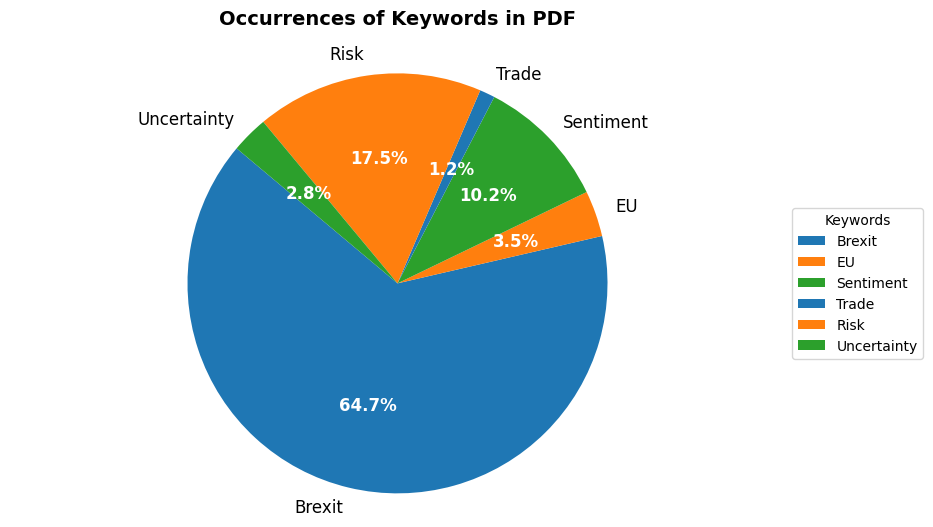

In [34]:
import matplotlib.pyplot as plt
from PyPDF2 import PdfReader
import json

def extract_text_from_pdf(file_path, keywords):
    try:
        with open(file_path, 'rb') as file:
            reader = PdfReader(file)
            results = []
            total_occurrences = {word: 0 for word in keywords}  # Initialize total counts
            for i in range(min(45, len(reader.pages))):
                page = reader.pages[i]
                text = page.extract_text()
                page_counts = {word: text.count(word) for word in keywords}
                for word, count in page_counts.items():
                    total_occurrences[word] += count  # Add to total count
                results.append({
                    "page_number": i + 1,
                    "word_counts": page_counts,
                    "extracted_text": text
                })
            return results, total_occurrences

    except FileNotFoundError:
        return f"Error: The file {file_path} was not found.", {}
    except OSError:
        return f"Error: Could not read the file {file_path}. It may be corrupted or unreadable.", {}
    except Exception as e:
        return f"An unexpected error occurred: {str(e)}", {}

def save_results_to_json(results, output_path):
    if isinstance(results, str):
        print(results)  # Print error messages directly
    else:
        with open(output_path, 'w') as file:
            json.dump(results, file, indent=4)
        print(f"Results saved to {output_path}")

def plot_occurrences(total_occurrences):
    words = list(total_occurrences.keys())
    counts = list(total_occurrences.values())
    
    plt.figure(figsize=(10, 6))
    
    # Create a pie chart with improved formatting and professional colors
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']  # Professional color scheme with more colors
    wedges, texts, autotexts = plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=140, colors=colors)
    
    # Improve the look of the chart
    for text in texts:
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_color('white')
        autotext.set_weight('bold')
    
    plt.title('Occurrences of Keywords in PDF', fontsize=14, weight='bold', pad=20)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.legend(wedges, words, title="Keywords", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.show()

def process_pdf_file():
    file_path = 'The Journal of Finance - 2023 - HASSAN - The Global Impact of Brexit Uncertainty.pdf'
    output_path = 'results.json'
    keywords = ["Brexit", "EU", "Sentiment", "Trade", "Risk", "Uncertainty"]
    results, total_occurrences = extract_text_from_pdf(file_path, keywords)
    save_results_to_json(results, output_path)
    print("Total occurrences:")
    for word, count in total_occurrences.items():
        print(f"{word}: {count}")
    plot_occurrences(total_occurrences)

# Run the function
process_pdf_file()
